# RKI Corona Plots

## 7 Tages Inzidenz pro Bundesland

In [7]:
import pandas as pd 
Bundeslaender_RM7 = pd.read_csv("data/RKI_Corona_Bundeslaender_RM7.csv")
Bundeslaender_RM7['Meldedatum'] = pd.to_datetime(Bundeslaender_RM7['Meldedatum'],format='%Y/%m/%d')

In [10]:
Bundeslaender_RM7_lastday=Bundeslaender_RM7.loc[Bundeslaender_RM7["Meldedatum"]==Bundeslaender_RM7["Meldedatum"].iloc[-1]].sort_values(by="7 Tage Indizdenz", ascending=False).reset_index(drop=True)

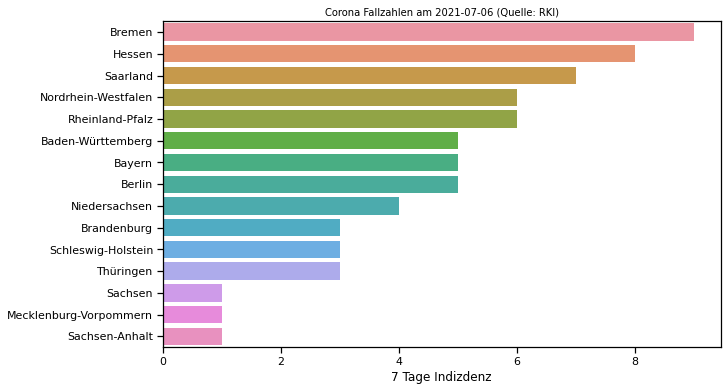

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_context("notebook")
fig , ax = plt.subplots(figsize=(10,6))

# plot
ax = sns.barplot(data=Bundeslaender_RM7_lastday,y="Bundesland", x="7 Tage Indizdenz")

# title
last_date = Bundeslaender_RM7_lastday.iloc[-1,0].strftime('%Y-%m-%d') # letztes Datum als Datenstand
ax.set_title("Corona Fallzahlen am "+last_date+" (Quelle: RKI)", fontsize=10)

# Label
ax.set_ylabel("")

plt.savefig('Bundeslaender_RKI-Coronazahlen_Stand'+last_date+'.png', bbox_inches='tight', dpi=150)
plt.show()

Mit Wert innerhalb des Graphs über eine Funktion

In [12]:
def show_values_on_bars(axs, h_v="v", space=0.4, space2=0):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() / 2 + float(space2)
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="right", va="center", c="white")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

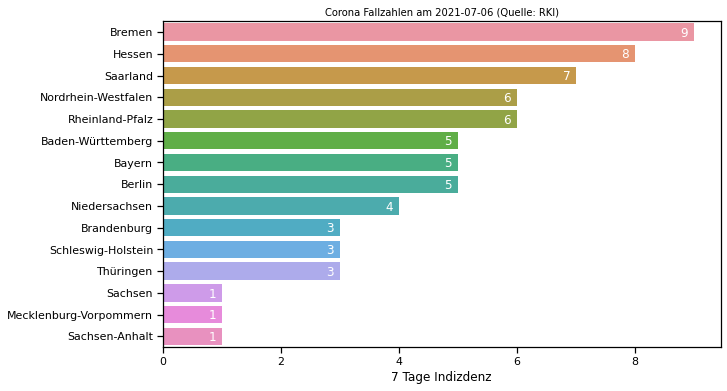

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_context("notebook")
fig , ax = plt.subplots(figsize=(10,6))

# plot
ax = sns.barplot(data=Bundeslaender_RM7_lastday,y="Bundesland", x="7 Tage Indizdenz")

# show values
show_values_on_bars(ax, "h", -0.1,0.05) # Zahlen hinzufügen

# title
last_date = Bundeslaender_RM7_lastday.iloc[-1,0].strftime('%Y-%m-%d') # letztes Datum als Datenstand
ax.set_title("Corona Fallzahlen am "+last_date+" (Quelle: RKI)", fontsize=10)

# Label
ax.set_ylabel("")

plt.savefig('Bundeslaender_RKI-Coronazahlen_Stand'+last_date+'.png', bbox_inches='tight', dpi=150)
plt.show()

## Leipzig 

In [18]:
Leipzig = pd.read_csv("data/RKI_Corona_Leipzig.csv")
Leipzig['Meldedatum'] = pd.to_datetime(Leipzig['Meldedatum'],format='%Y/%m/%d')

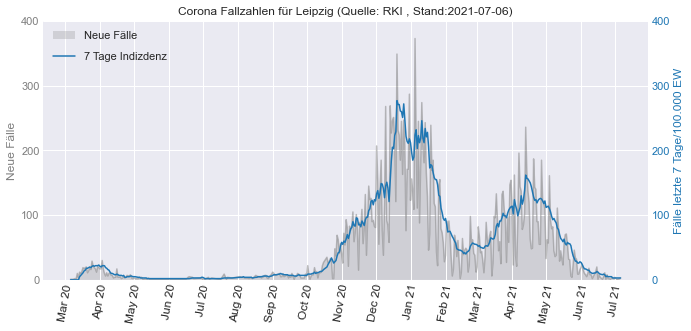

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as tkr 

# Allgemein
plt.style.use('seaborn-darkgrid') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )
plt.rcParams.update({'font.size': 20});

# Set Figure
fig , ax1 = plt.subplots(figsize=(10,5))

# Plot 1 : ax1 - neue Fälle

# Plot
ax1.plot(Leipzig["Meldedatum"],Leipzig["Neue Fallzahlen"], color='tab:gray', alpha=0.5)
ax1.fill_between(Leipzig["Meldedatum"], Leipzig["Neue Fallzahlen"], 0, facecolor ='tab:gray', alpha=0.25, zorder=-99, label="Neue Fälle") 

# Plot 2 : ax2 - Fälle kumuliert
ax2 = ax1.twinx()

# Plot
ax2.plot(Leipzig["Meldedatum"],Leipzig["7 Tage Indizdenz"], color='tab:blue',label="7 Tage Indizdenz", zorder=99)
ax2.grid()

# Legenden
ax1.legend(bbox_to_anchor=(0, 1.0), loc='upper left')
ax2.legend(bbox_to_anchor=(0, 0.92), loc='upper left')

# Zahlen der y-Achse Tausend mit Komma trennen
ax1.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))
ax2.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))

# Farben der zwei y-Achsen anpassen (mit Beschriftung)
ax1.set_ylabel('Neue Fälle', color='tab:gray')
ax2.set_ylabel("Fälle letzte 7 Tage/100.000 EW", color='tab:blue')
ax1.tick_params(colors='tab:gray', which='both', axis="y") 
ax2.tick_params(colors='tab:blue', which='both', axis="y") 

# y ticks Anpassen
ax1.set_ylim(bottom=0, top=400) # Achse 2 Limits
ax2.set_ylim(bottom=0, top=400) # Achse 1 Limits

nticks=5 # Anzahl Ticks für Achse 1 und 2
ax1.yaxis.set_major_locator(tkr.LinearLocator(nticks))
ax2.yaxis.set_major_locator(tkr.LinearLocator(nticks))

# x ticks Anpassen
ax1.xaxis.set_major_locator(dates.MonthLocator(interval=1)) # jeden Monat ein Tick
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %y')) # Darstellung Monatsnamekurz + Jahr

# x Tick Schrift Formatierung (Variante 1: eigene Einstellungen)
labels = ax1.get_xticklabels(); # labels auslesen um diese noch mal zu formatieren
plt.setp(labels, rotation=80, fontsize=12); # Labels drehen

# x Tick Schrift Formatierung (Variante 2: automatisch)
#fig.autofmt_xdate()

# title
last_date = Leipzig.iloc[-1,0].strftime('%Y-%m-%d') # letztes Datum als Datenstand
ax1.set_title("Corona Fallzahlen für Leipzig (Quelle: RKI , Stand:"+last_date+")", fontsize=12)

plt.tight_layout()
plt.savefig('Leipzig_RKI-Coronazahlen_Stand'+last_date+'.png', bbox_inches='tight', dpi=150)
plt.show()


## Aufgabe

Plotten Sie die Zahlen für Deutschland 

1. pandas Dataframe `Bundeslaender_RM7` für Bundesländer pro Tag aufsummieren (neuen Dataframe erzeugen) 
1. Spalte `7 Tage Indizdenz` über das `Meldedatum` plotten

In [20]:
Bundeslaender_RM7

,Meldedatum,Bundesland,Neue Fallzahlen,Neue Fallzahlen Mittelwert (7 Tage),Neue Fallzahlen Summe (7 Tage),Faelle gesamt,7 Tage Indizdenz
0,2020-01-02 00:00:00+00:00,Nordrhein-Westfalen,1,0,0,1,0.0
1,2020-02-20 00:00:00+00:00,Nordrhein-Westfalen,1,0,0,2,0.0
2,2020-02-26 00:00:00+00:00,Nordrhein-Westfalen,3,0,0,5,0.0
3,2020-02-27 00:00:00+00:00,Nordrhein-Westfalen,18,0,0,23,0.0
4,2020-02-28 00:00:00+00:00,Nordrhein-Westfalen,34,0,0,57,0.0
...,...,...,...,...,...,...,...
7747,2021-07-02 00:00:00+00:00,Sachsen-Anhalt,2,3,23,99244,1.0
7748,2021-07-03 00:00:00+00:00,Sachsen-Anhalt,3,3,24,99247,1.0
7749,2021-07-04 00:00:00+00:00,Sachsen-Anhalt,1,3,24,99248,1.0
7750,2021-07-05 00:00:00+00:00,Sachsen-Anhalt,3,3,22,99251,1.0
